### Bank Term Deposit Subscription Prediction
### Team 9 : Srinivas, Ravi
### LTC - IIT M Batch 1 - Sep 2025

In [16]:
#Load the synthetic data set from the P5S8 challenge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
train_syndata = pd.read_csv('./playground-series-s5e8/train.csv')
test_syndata = pd.read_csv('./playground-series-s5e8/test.csv')

#Load the real data set from the P5S8 channelnge
fulldata = pd.read_csv('./archive/bank-full.csv', sep=';')


####  1. Data Understanding & Exploration
####  Load both datasets and explore:– Feature types (categorical, numerical) – Missing values – Target distribution

In [17]:
# Find the the number and names of the columns in both datasets
print("Training Data Columns: and shape", train_syndata.columns, train_syndata.shape)
print("Test Data Columns: and shape", test_syndata.columns, test_syndata.shape)
print("Full Data Columns: and shape", fulldata.columns, fulldata.shape)

Training Data Columns: and shape Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object') (750000, 18)
Test Data Columns: and shape Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object') (250000, 17)
Full Data Columns: and shape Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object') (45211, 17)


 Synthetic dataset: Available in the competition’s Dataset Link. Train and Test
 dataset are given. You can combine both the dataset for training
 • Test Dataset: extract 20 % of dataset from Real Dataset for testing the prediction
 accuracy of your model.

In [23]:
# Now we need to combine the Train and Test to make it a single training data set
# The outcome variable 'y' is not present in the test data, so we will add a placeholder column for it
# Since the test data does not have 'y', we will fill it with mode of the train data 'y' column
print("Mode of 'y' in training data:", train_syndata['y'].mode())
test_syndata['y'] = train_syndata['y'].mode()[0]  # Add a placeholder column for 'y' in the test set

# Combine the training and test datasets
syndata = pd.concat([train_syndata, test_syndata], ignore_index=True)

# Remove the "id" column from the Synthetic Data dataframe if it exists
if 'id' in syndata.columns:
    syndata = syndata.drop(columns=['id'])

print("Combined Synthetic Data shape:", syndata.shape)

Mode of 'y' in training data: 0    0
Name: y, dtype: int64
Combined Synthetic Data shape: (1000000, 17)


In [24]:
# Take 20% of the full data as test set
_, test_fulldata = train_test_split(fulldata, test_size=0.2, random_state=42)
print("Test Full Data shape:", test_fulldata.shape)

Test Full Data shape: (9043, 17)


In [26]:
# Count the number of numerical and categorical feature types in the synthetic dataset

syndata_numerical = syndata.select_dtypes(include=['int64', 'float64']).columns
syndata_categorical = syndata.select_dtypes(include=['object', 'category']).columns
test_fulldata_numerical = test_fulldata.select_dtypes(include=['int64', 'float64']).columns
test_fulldata_categorical = test_fulldata.select_dtypes(include=['object', 'category']).columns

# Print column names and data types side by side for quick comparison
syn_types = syndata.dtypes.to_frame('Synthetic dtype')
full_types = test_fulldata.dtypes.to_frame('Full dtype')
comparison = syn_types.join(full_types, how='outer')
print(comparison.reset_index().rename(columns={'index': 'column'}).to_string(index=False))

# Find columns where the type (numerical/categorical) does not match between synthetic and full data

mismatched_columns = []

for col in syndata.columns:
    if col in test_fulldata.columns:
        syndata_type = 'numerical' if syndata[col].dtype in ['int64', 'float64'] else 'categorical'
        test_fulldata_type = 'numerical' if test_fulldata[col].dtype in ['int64', 'float64'] else 'categorical'
        if syndata_type != test_fulldata_type:
            mismatched_columns.append((col, syndata_type, test_fulldata_type))

if mismatched_columns:
    print("Columns with mismatched types between synthetic and full data:")
    for col, syn_type, full_type in mismatched_columns:
        print(f"{col}: Synthetic = {syn_type}, Full = {full_type}")
else:
    print("No mismatched columns found.")



   column Synthetic dtype Full dtype
      age           int64      int64
  balance           int64      int64
 campaign           int64      int64
  contact          object     object
      day           int64      int64
  default          object     object
 duration           int64      int64
education          object     object
  housing          object     object
      job          object     object
     loan          object     object
  marital          object     object
    month          object     object
    pdays           int64      int64
 poutcome          object     object
 previous           int64      int64
        y           int64     object
Columns with mismatched types between synthetic and full data:
y: Synthetic = numerical, Full = categorical


In [27]:
print("Distinct values in 'y' and their counts (Synthetic Data):")
print(pd.concat([syndata['y'].value_counts(), syndata['y'].value_counts(normalize=True)], axis=1))
print("Distinct values in 'y' and their counts (Test Full Data):")
print(pd.concat([test_fulldata['y'].value_counts(), test_fulldata['y'].value_counts(normalize=True)],axis=1))

Distinct values in 'y' and their counts (Synthetic Data):
    count  proportion
y                    
0  909512    0.909512
1   90488    0.090488
Distinct values in 'y' and their counts (Test Full Data):
     count  proportion
y                     
no    7952    0.879354
yes   1091    0.120646


In [28]:
# Convert "no" to 0 and "yes" to 1 in the 'y' column of test_fulldata

if 'y' in test_fulldata.columns:
    test_fulldata['y'] = test_fulldata['y'].map({'no': 0, 'yes': 1})

print("Distinct values in 'y' and their counts (Synthetic Data):")
print(pd.concat([syndata['y'].value_counts(), syndata['y'].value_counts(normalize=True)], axis=1))
print("Distinct values in 'y' and their counts (Test Full Data):")
print(pd.concat([test_fulldata['y'].value_counts(), test_fulldata['y'].value_counts(normalize=True)],axis=1))

Distinct values in 'y' and their counts (Synthetic Data):
    count  proportion
y                    
0  909512    0.909512
1   90488    0.090488
Distinct values in 'y' and their counts (Test Full Data):
   count  proportion
y                   
0   7952    0.879354
1   1091    0.120646


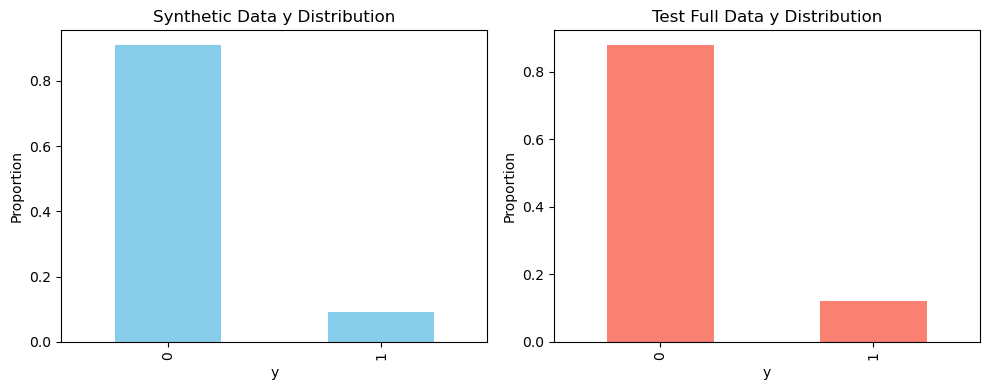

In [29]:
# Plot the distribution of "y" variable side by side for synthetic and test full data

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

syndata['y'].value_counts(normalize=True).plot(kind='bar', ax=axes[0], color='skyblue', title='Synthetic Data y Distribution')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Proportion')

test_fulldata['y'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='salmon', title='Test Full Data y Distribution')
axes[1].set_xlabel('y')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [30]:
# Explore missing values in syndata, ignoring 'y' and features without missing values

missing = syndata.drop(columns=['y'], errors='ignore').isnull().sum()
missing = missing[missing > 0]
print("Features with missing values in syndata (excluding 'y'):")
print(missing)

Features with missing values in syndata (excluding 'y'):
Series([], dtype: int64)


In [31]:
# Compare summary statistics between synthetic data and test full data for numerical features
# Highlight statistically significant deviations

import numpy as np

numerical_cols = [col for col in syndata.select_dtypes(include=['int64', 'float64']).columns if col in test_fulldata.columns]

syn_stats = syndata[numerical_cols].describe().T
test_stats = test_fulldata[numerical_cols].describe().T

comparison = syn_stats[['mean', 'std', 'min', 'max']].join(
    test_stats[['mean', 'std', 'min', 'max']],
    lsuffix='_synthetic', rsuffix='_test'
)

# Highlight columns where mean differs by more than 10% (relative difference)
comparison['mean_diff_pct'] = np.abs(comparison['mean_synthetic'] - comparison['mean_test']) / (comparison['mean_test'] + 1e-9)
significant = comparison[comparison['mean_diff_pct'] > 0.1]

print("Summary statistics for numerical features (synthetic vs test full data):")
print(comparison)

if not significant.empty:
    print("\nFeatures with >10% difference in mean between synthetic and test full data:")
    print(significant[['mean_synthetic', 'mean_test', 'mean_diff_pct']])
else:
    print("\nNo features with >10% difference in mean found.")

Summary statistics for numerical features (synthetic vs test full data):
          mean_synthetic  std_synthetic  min_synthetic  max_synthetic  \
age            40.927879      10.094523           18.0           95.0   
balance      1202.407136    2812.750998        -8019.0        99717.0   
day            16.116924       8.252748            1.0           31.0   
duration      256.007423     272.268420            1.0         4918.0   
campaign        2.576143       2.716302            1.0           63.0   
pdays          22.379557      77.219149           -1.0          871.0   
previous        0.299841       1.348254            0.0          200.0   
y               0.090488       0.286880            0.0            1.0   

            mean_test     std_test  min_test  max_test  mean_diff_pct  
age         40.957757    10.620892      18.0      93.0       0.000729  
balance   1367.175163  3130.151376   -2712.0   98417.0       0.120517  
day         15.761141     8.309233       1.0      31.

In [39]:
# Compare the counts and proportions of categorical variable values between syndata and test_fulldata
# Print value counts and proportions side by side for each categorical variable
# Highlight and print only those value counts and categorical variables where proportions differ significantly (>10% absolute difference)

categorical_cols = [col for col in syndata.select_dtypes(include=['object', 'category']).columns if col in test_fulldata.columns]

for col in categorical_cols:
    syn_props = syndata[col].value_counts(normalize=True)
    test_props = test_fulldata[col].value_counts(normalize=True)
    # Align indexes
    all_values = syn_props.index.union(test_props.index)
    syn_props = syn_props.reindex(all_values, fill_value=0)
    test_props = test_props.reindex(all_values, fill_value=0)
    diff = (syn_props - test_props).abs()
    significant = diff > 0.1
    if significant.any():
        result = pd.DataFrame({
            'Synthetic Proportion': syn_props[significant],
            'Test Full Proportion': test_props[significant]
        })
        print(f"\nSignificant proportion differences for '{col}':")
        print(result)

#####  We have the following observations
###### The Synthetic and Real data sets are almost identically distributed for each feature
###### The 'y' variable in Synthetic data set is 0/1 and in Real data set is yes/no, so we have converted the latter to the former taking 1 for yes
###### The 'pdays' and 'previous' features are mean shifted, the Real data set has means further toward the right. 
###### We may need to do some feature engineering or transformations for the above two features.


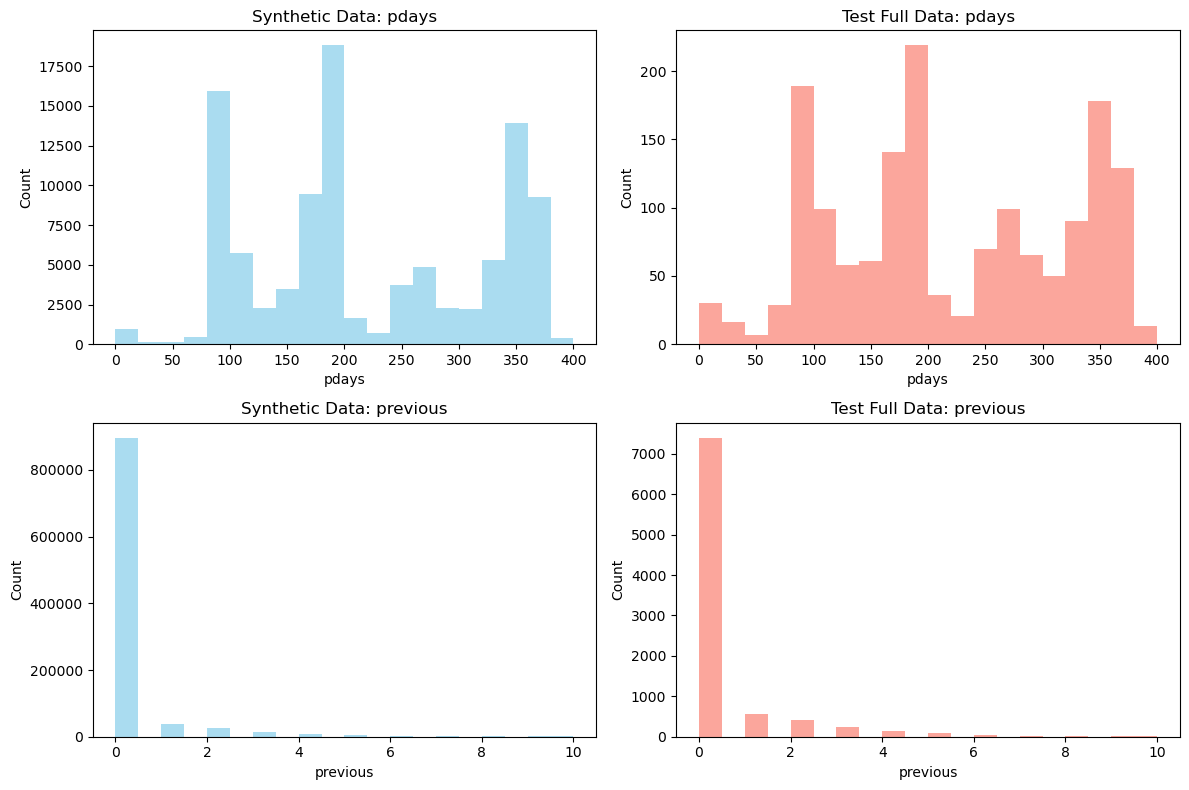

In [45]:
# Plot the histograms of 'pdays' and 'previous' in both datasets side by side with adjusted range and reduced bin size
# For 'pdays', use a limit of 400; for 'previous', use a limit of 25 for both datasets

features = ['pdays', 'previous']
limits = {'pdays': (0, 400), 'previous': (0, 10)}
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(features):
    min_val, max_val = limits[feature]
    bins = 20  # Reduce bin size for better shape

    axes[i, 0].hist(
        syndata[feature].dropna(),
        bins=bins,
        range=(min_val, max_val),
        color='skyblue',
        alpha=0.7
    )
    axes[i, 0].set_title(f"Synthetic Data: {feature}")
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel("Count")

    axes[i, 1].hist(
        test_fulldata[feature].dropna(),
        bins=bins,
        range=(min_val, max_val),
        color='salmon',
        alpha=0.7
    )
    axes[i, 1].set_title(f"Test Full Data: {feature}")
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

pdays Z-standardized mean (synthetic): 0.0000
pdays Z-standardized mean (test full): 0.0000
Difference: 0.0000, Percentage difference: 0.00%

previous Z-standardized mean (synthetic): 0.0000
previous Z-standardized mean (test full): 0.0000
Difference: 0.0000, Percentage difference: 0.00%



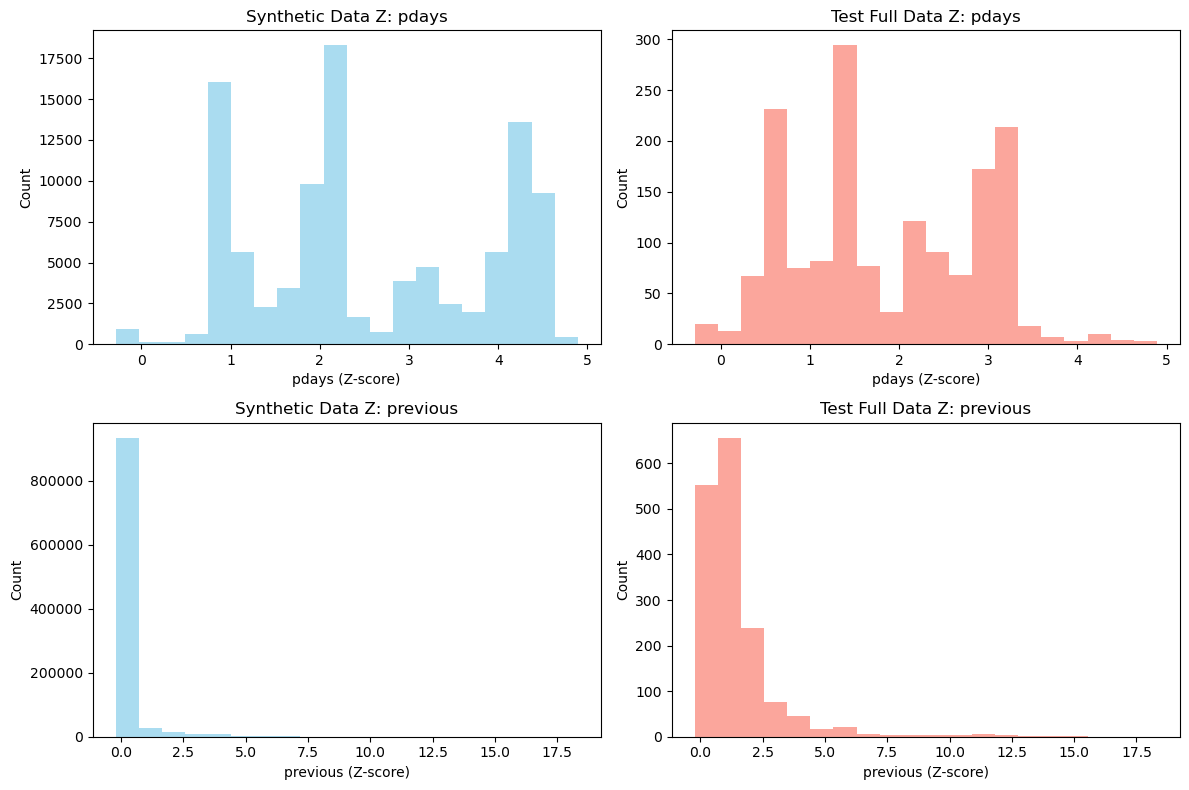

In [46]:
# Z-standardize 'pdays' and 'previous' in both datasets, recalculate mean differences, and replot histograms

features = ['pdays', 'previous']
limits = {'pdays': (0, 400), 'previous': (0, 25)}

# Z-standardization
for feature in features:
    # Synthetic data
    syn_mean = syndata[feature].mean()
    syn_std = syndata[feature].std()
    syndata[f'{feature}_z'] = (syndata[feature] - syn_mean) / syn_std

    # Test full data
    test_mean = test_fulldata[feature].mean()
    test_std = test_fulldata[feature].std()
    test_fulldata[f'{feature}_z'] = (test_fulldata[feature] - test_mean) / test_std

    # Print mean and percentage difference after standardization
    syn_z_mean = syndata[f'{feature}_z'].mean()
    test_z_mean = test_fulldata[f'{feature}_z'].mean()
    mean_diff = syn_z_mean - test_z_mean
    pct_diff = 100 * abs(mean_diff) / (abs(test_z_mean) + 1e-9)
    print(f"{feature} Z-standardized mean (synthetic): {syn_z_mean:.4f}")
    print(f"{feature} Z-standardized mean (test full): {test_z_mean:.4f}")
    print(f"Difference: {mean_diff:.4f}, Percentage difference: {pct_diff:.2f}%\n")

# Plot histograms for Z-standardized features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    # Transform limits to Z-scale using synthetic data stats
    min_z = (limits[feature][0] - syndata[feature].mean()) / syndata[feature].std()
    max_z = (limits[feature][1] - syndata[feature].mean()) / syndata[feature].std()
    bins = 20

    axes[i, 0].hist(
        syndata[f'{feature}_z'].dropna(),
        bins=bins,
        range=(min_z, max_z),
        color='skyblue',
        alpha=0.7
    )
    axes[i, 0].set_title(f"Synthetic Data Z: {feature}")
    axes[i, 0].set_xlabel(f"{feature} (Z-score)")
    axes[i, 0].set_ylabel("Count")

    axes[i, 1].hist(
        test_fulldata[f'{feature}_z'].dropna(),
        bins=bins,
        range=(min_z, max_z),
        color='salmon',
        alpha=0.7
    )
    axes[i, 1].set_title(f"Test Full Data Z: {feature}")
    axes[i, 1].set_xlabel(f"{feature} (Z-score)")
    axes[i, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()